In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data0 = pickle.load( open( "../input/heatmapstats/heatmaps0rar/data.p", "rb" ) )#Sharp LIME explanations
data1 = pickle.load( open( "../input/heatmapstats/heatmaps1rar/data.p", "rb" ) )#Sharp LIME explanations
data2 = pickle.load( open( "../input/heatmapstats/heatmaps2rar/data.p", "rb" ) )#Sharp LIME explanations
masks = pickle.load( open( "../input/heatmapstats/maskdata/maskdata.p", "rb" ) )#Superpixel int labels

In [3]:
data0 = np.array([data0[item][0] for item in data0.keys()]).squeeze()
data1 = np.array([data1[item][0] for item in data1.keys()]).squeeze()
data2 = np.array([data2[item][0] for item in data2.keys()]).squeeze()
masks = np.array([masks[item][1] for item in masks.keys()]).squeeze()

In [4]:
#Compute pixel wise averages, standard deviations and the Coefficient of Variation (CV)
avgs = np.abs(np.mean([data0,data1,data2],axis=0))
devis = np.abs(np.std([data0,data1,data2],axis=0))
CV = devis/avgs

In [5]:
#Extract CV for each superpixel in the dataset
all_avgs = []
all_cvs = []

for i, mask in enumerate(masks):
    for segment in np.unique(mask):
        avg_segment = avgs[i][mask==segment][0]
        CV_segment = CV[i][mask==segment][0]
        all_avgs.append(avg_segment)
        all_cvs.append(CV_segment)

Text(0.5, 0, 'Absolute Average Explanation Weight')

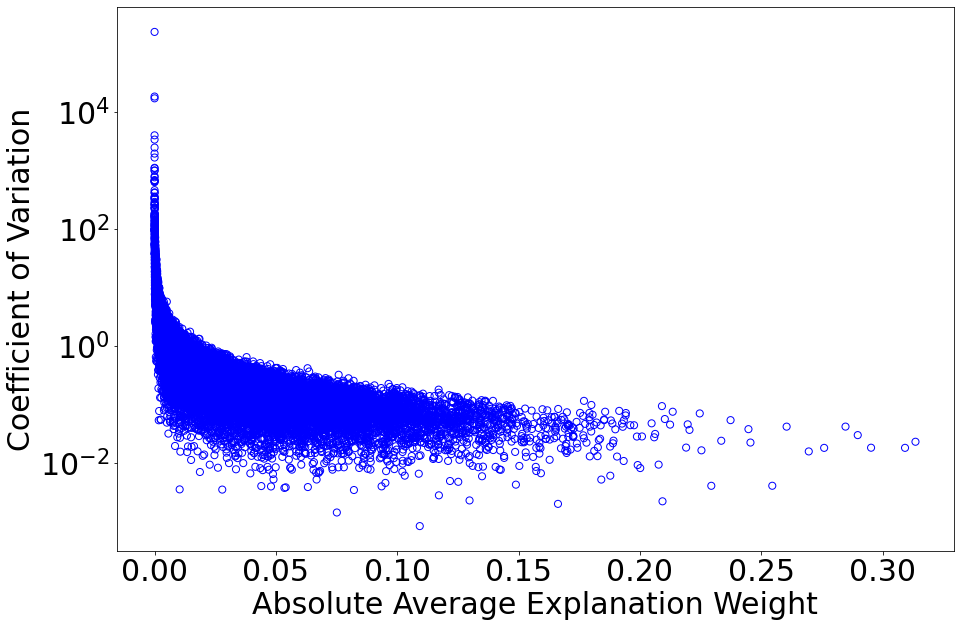

In [6]:
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams['font.size']=30 
plt.scatter(all_avgs,all_cvs,marker='.',facecolors='none', edgecolors='Blue',s=200)
plt.yscale('log')
plt.ylabel('Coefficient of Variation')
plt.xlabel('Absolute Average Explanation Weight')